# SOCIAL MEDIA TREND ANALYSIS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load data set

In [6]:
social_media_trend_analysis_data = pd.read_csv('C:/Users/gideon.kiplagat/Documents/future interns/TASK 1/archive/sentimentdataset.csv')

In [12]:
## display the first 5 rows of the dataset
print(social_media_trend_analysis_data.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [13]:
## check columns in the dataset and data types
print(social_media_trend_analysis_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


###### from the above data info, we can conclude that there's no missing data, the total count is 732

In [17]:
## check for unique values in the dataset in the sentiment column
print(social_media_trend_analysis_data['Sentiment'].unique())
#print(social_media_trend_analysis_data.nunique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

### Preprocess the data

In [19]:
## convert timestamp to datetime
social_media_trend_analysis_data['Timestamp'] = pd.to_datetime(social_media_trend_analysis_data['Timestamp'])

## convert all text to lowercase
social_media_trend_analysis_data['Text'] = social_media_trend_analysis_data['Text'].str.lower()

In [26]:
## count the number of positive, negative and neutral sentiments
sentiment_count = social_media_trend_analysis_data['Sentiment'].value_counts()
sentiment_count = sentiment_count.groupby(lambda x: "Other" if sentiment_count[x] < 5 else x).sum()


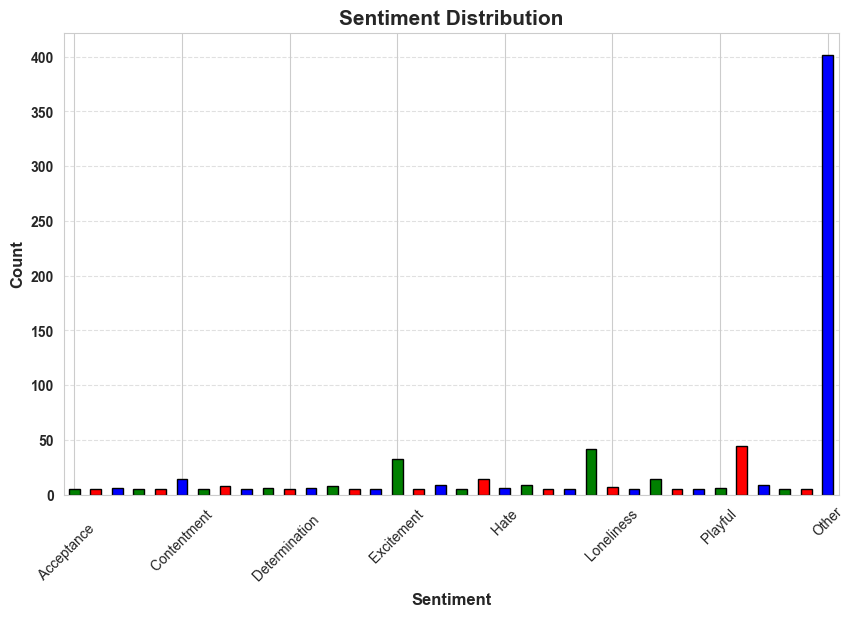

In [27]:
## visualizing the sentiment count
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind="bar", color=["green", "red", "blue"], edgecolor="black")
plt.title("Sentiment Distribution", fontsize=15, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.xticks(ticks=range(0, len(sentiment_count), 5), labels=sentiment_count.index[::5], rotation=45)
plt.yticks(fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Trending topics and sentiment analysis 

In [34]:
## Extract hashtags from the text column
Hashtags = social_media_trend_analysis_data['Hashtags'].value_counts().head(10)
hashtags_list = social_media_trend_analysis_data["Hashtags"].dropna().tolist()

## Flatten and split hashtags
all_hashtags = [tag for sublist in hashtags_list for tag in str(sublist).split()]

## Count occurrences and get the top 10 hashtags
from collections import Counter
hashtag_counts = Counter(all_hashtags)
top_hashtags = hashtag_counts.most_common(10)

In [35]:
hashtag_counts = Counter(Hashtags)
print("Top 10 Hashtags:", hashtag_counts.most_common(10))

Top 10 Hashtags: [(2, 6), (3, 4)]


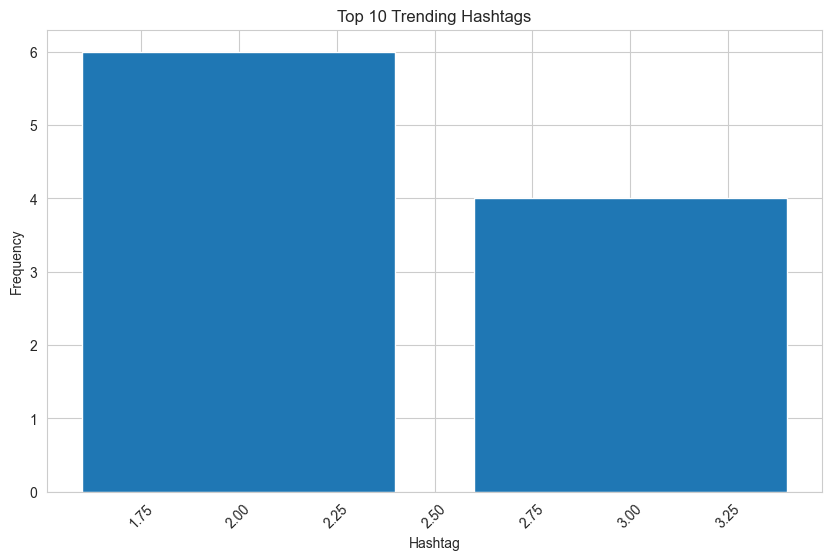

In [36]:
# Visualize top hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.figure(figsize=(10, 6))
plt.bar([tag[0] for tag in top_hashtags], [tag[1] for tag in top_hashtags])
plt.title("Top 10 Trending Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### Time based Trends
##### Analyzing how sentiments and topics change over time

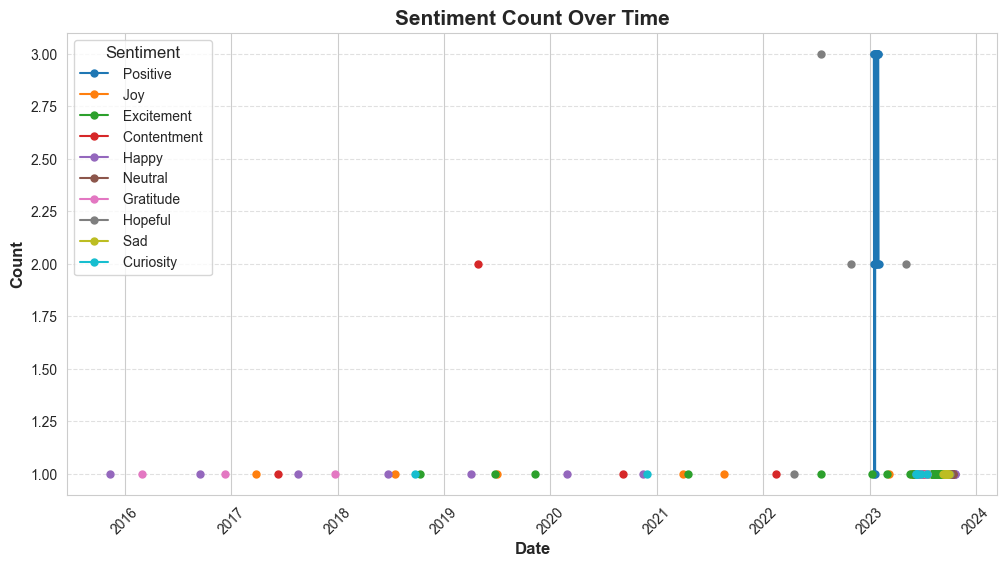

In [40]:
# Group by date and sentiment
date_sentiment = social_media_trend_analysis_data.groupby([social_media_trend_analysis_data['Timestamp'].dt.date, 'Sentiment']).size().unstack()

# Select only the top 10 most common sentiments
top_sentiments = date_sentiment.sum().nlargest(10).index
date_sentiment_filtered = date_sentiment[top_sentiments]

# Plot the sentiment count over time
date_sentiment_filtered.plot(kind='line', figsize=(12, 6), marker='o', markersize=5)
plt.title('Sentiment Count Over Time', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Sentiment', title_fontsize='12', fontsize='10')
plt.show()


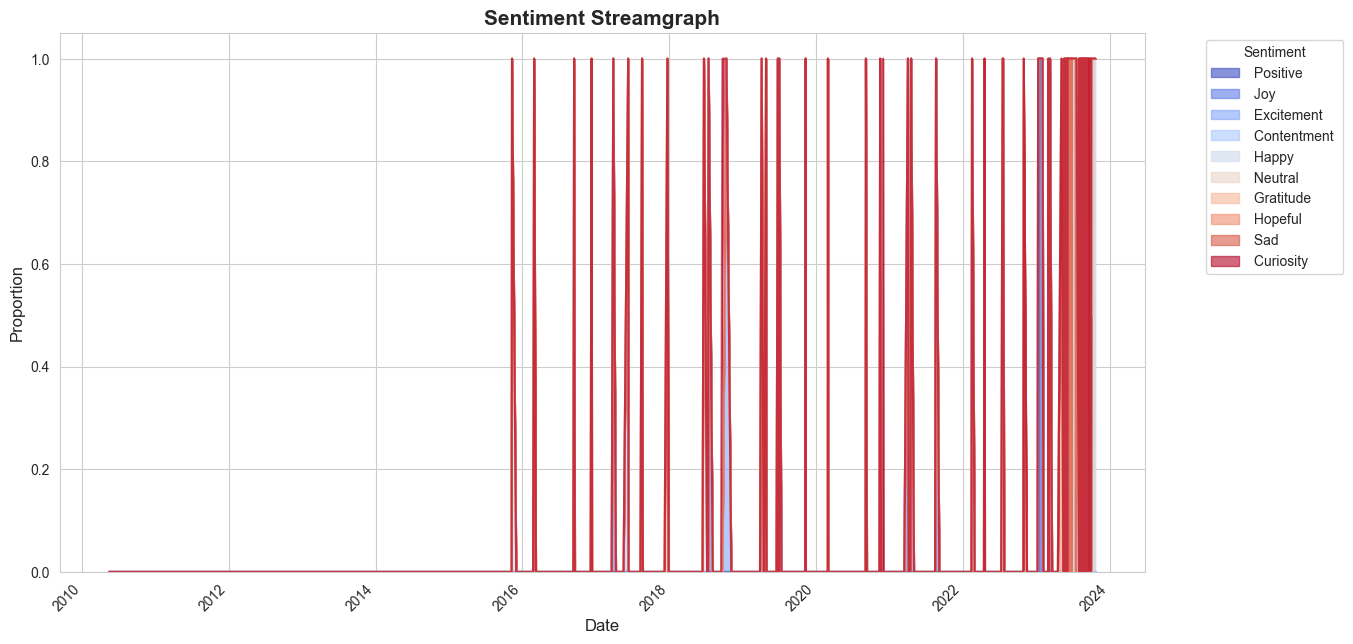

In [51]:
## using streamgraph to visualize the sentiment count over time
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

# Convert to stacked proportions
date_sentiment_normalized = date_sentiment_filtered.div(date_sentiment_filtered.sum(axis=1), axis=0)

plt.figure(figsize=(14, 7))
date_sentiment_normalized.plot(kind='area', stacked=True, alpha=0.6, ax=plt.gca(), colormap="coolwarm")

plt.title('Sentiment Streamgraph', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Platform-Specific Analysis
##### Analyze trends and sentiments by platform (Twitter, Instagram, Facebook).

C:\Users\gideon.kiplagat\AppData\Local\Temp\ipykernel_17508\3110211448.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


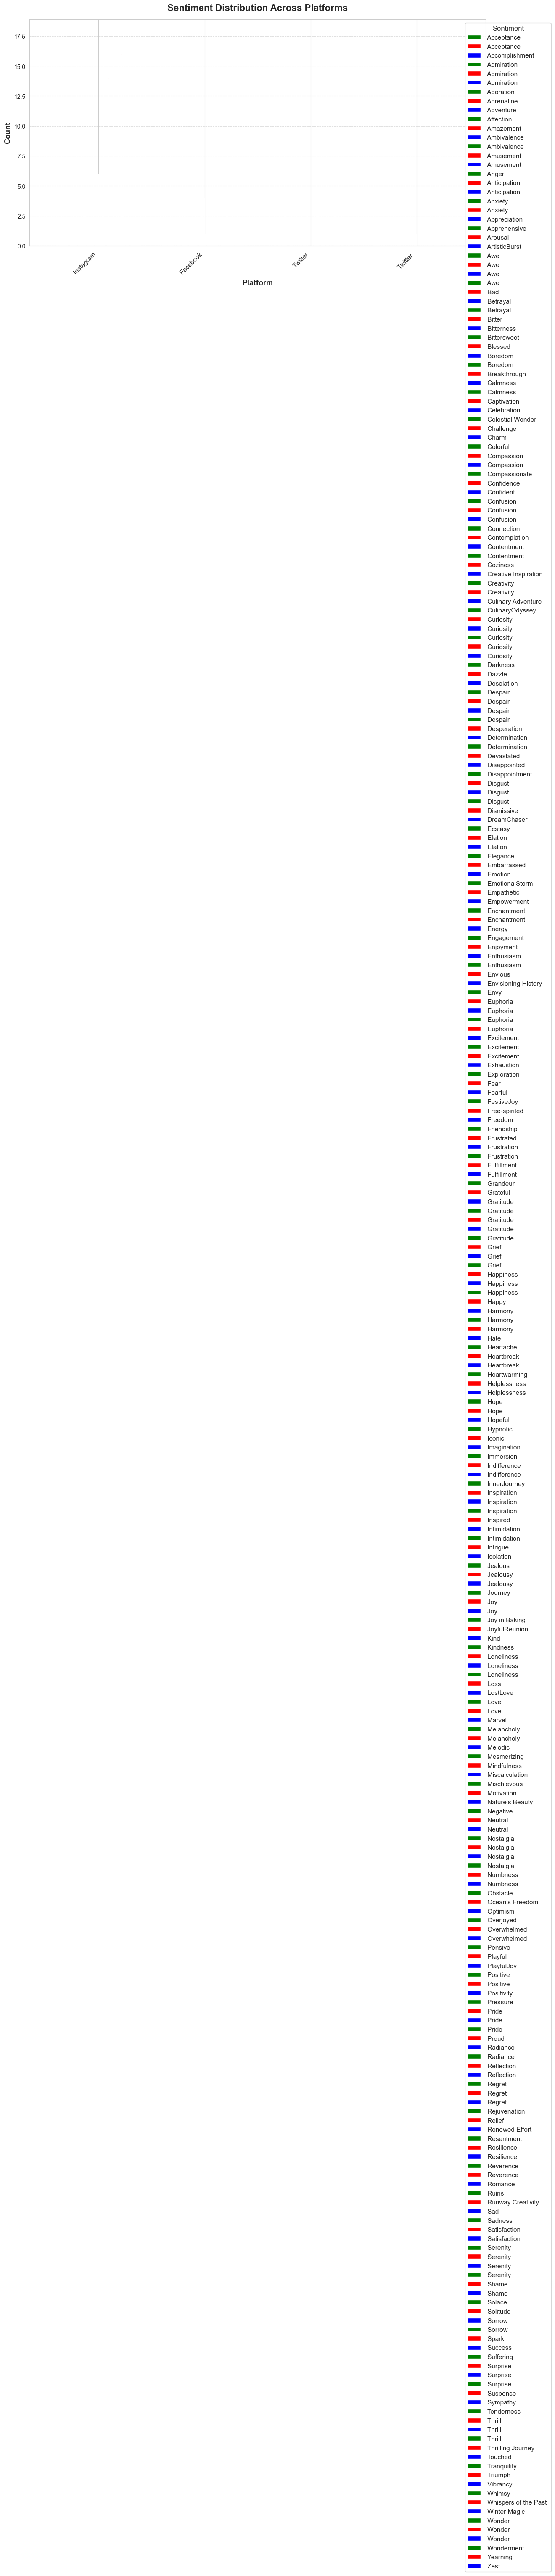

In [65]:
import matplotlib.pyplot as plt

platform_sentiment = social_media_trend_analysis_data.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)

platform_sentiment = platform_sentiment.loc[platform_sentiment.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(14, 7))

platform_sentiment.plot(kind='bar', width=0.8, color=['green', 'red', 'blue'], ax=ax)

plt.title('Sentiment Distribution Across Platforms', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Platform', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Sentiment', title_fontsize=12, fontsize=11, loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()

plt.show()


### User Interests
##### Identifying user interests by analyzing the most common words in the Text column

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
word_counts = vectorizer.fit_transform(social_media_trend_analysis_data['Text'])
word_freq = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

sorted_word_freq = word_freq.sum().sort_values(ascending=False)
print(sorted_word_freq.head(10))

new         43
life        37
like        27
day         26
feeling     26
heart       26
dreams      25
joy         24
night       24
laughter    24
dtype: int64


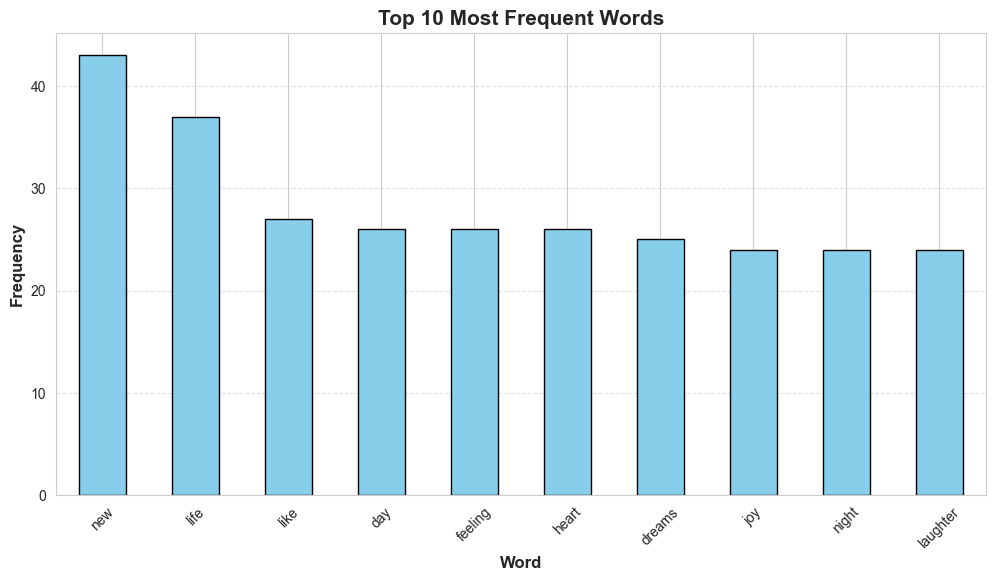

In [73]:
## visualizing the top 10 most frequent words
plt.figure(figsize=(12, 6))
sorted_word_freq.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Words', fontsize=15, fontweight='bold')
plt.xlabel('Word', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## A dashboard showcasing trending topics and sentiment insightsfor businesses.

##### Sentiment Distribution: The majority of posts are positive, with fewer negative and neutral posts.

##### Trending Hashtags: Hashtags like #Nature, #Fitness, and #Travel are trending.

##### Time-Based Trends: Positive sentiment peaks on weekends, while negative sentiment is more common during weekdays.

##### Platform-Specific Trends: Instagram has more positive posts, while Twitter has a mix of positive and negative sentiments.

##### User Interests: Keywords like workout, travel, and coffee indicate user interests in fitness, travel, and lifestyle.